# Ada Boosting (Classification)

Data Source: [Balance Scale]("https://archive.ics.uci.edu/ml/datasets/balance+scale")

**Data Set Information**

This data set was generated to model psychological experimental results. Each example is classified as having the balance scale tip to the right, tip to the left, or be balanced. The attributes are the left weight, the left distance, the right weight, and the right distance. The correct way to find the class is the greater of (left-distance * left-weight) and (right-distance * right-weight). If they are equal, it is balanced.

**Attribute Information**

1. Class Name: 3 (L, B, R)
2. Left-Weight: 5 (1, 2, 3, 4, 5)
3. Left-Distance: 5 (1, 2, 3, 4, 5)
4. Right-Weight: 5 (1, 2, 3, 4, 5)
5. Right-Distance: 5 (1, 2, 3, 4, 5)

In [1]:
# Importing the necessary packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, RandomForestClassifier 
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load and read the data
balance = pd.read_csv("./balance_scale/balance-scale.txt")
balance.head()

,B,1,1.1,1.2,1.3
0,R,1,1,1,2
1,R,1,1,1,3
2,R,1,1,1,4
3,R,1,1,1,5
4,R,1,1,2,1


In [3]:
# Column rename as per source data
balance.columns = ["class", "left_weight", "left_distance", "right_weight", "right_distance"]
balance.head()

,class,left_weight,left_distance,right_weight,right_distance
0,R,1,1,1,2
1,R,1,1,1,3
2,R,1,1,1,4
3,R,1,1,1,5
4,R,1,1,2,1


In [4]:
# Export to .csv format
# balance.to_csv("./balance_scale/balance_scale.csv", index = None)

In [5]:
# Read the .csv format
balance_scale = pd.read_csv("./balance_scale/balance_scale.csv")
balance_scale.head()

,class,left_weight,left_distance,right_weight,right_distance
0,R,1,1,1,2
1,R,1,1,1,3
2,R,1,1,1,4
3,R,1,1,1,5
4,R,1,1,2,1


In [6]:
# Display the characteristics of the dataset
print("Dimension of dataset are: ", balance_scale.shape)
print("The variables present in dataset are: ", balance_scale.columns)

Dimension of dataset are:  (624, 5)
The variables present in dataset are:  Index(['class', 'left_weight', 'left_distance', 'right_weight',
       'right_distance'],
      dtype='object')


In [7]:
# Information about the dataset
balance_scale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   class           624 non-null    object
 1   left_weight     624 non-null    int64 
 2   left_distance   624 non-null    int64 
 3   right_weight    624 non-null    int64 
 4   right_distance  624 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


In [8]:
# Using random seed function to generate the same dataset
np.random.seed(3000)

In [9]:
# Train-Test Split
training, test = train_test_split(balance_scale, test_size = 0.3)

x_trg = training.drop("class", axis = 1)
y_trg = training["class"]

x_test = test.drop("class", axis = 1)
y_test = test["class"]

### Creating AdaBoost Model

In [10]:
# Model building
balance_ada = AdaBoostClassifier()

# Fit the model
balance_ada.fit(x_trg, y_trg)
print("Accuracy of AdaBoost model on training set is: ", balance_ada.score(x_trg, y_trg))

Accuracy of AdaBoost model on training set is:  0.9518348623853211


In [11]:
# Determine the accuracy of AdaBoost model
# Predicting via AdaBoost model
ada_pred = balance_ada.predict(x_test)

# Computing the accuracy score of the model
ada_acc_score = accuracy_score(y_test, ada_pred)
print("Accuracy of AdaBoost model is: ", ada_acc_score)

Accuracy of AdaBoost model is:  0.9042553191489362


#### Creating a new AdaBoost model with Grid Search

In [12]:
# Import the necessary package
from sklearn.model_selection import GridSearchCV

In [13]:
# Setting the parameters
param_grid = {"learning_rate" : [0.5,0.1], "n_estimators" : [50,100,200]}

In [14]:
# New model building
balance_ada_grid = AdaBoostClassifier()
balance_ada_CV = GridSearchCV(estimator = balance_ada_grid, param_grid = param_grid, cv = 5)

# Fit the model
balance_ada_result = balance_ada_CV.fit(x_trg, y_trg)
print("Best Parameters are: \n", balance_ada_CV.best_params_)

Best Parameters are: 
 {'learning_rate': 0.5, 'n_estimators': 50}


#### Creating the model with best scores

In [15]:
# Model building - best
balance_ada_best = AdaBoostClassifier(learning_rate = balance_ada_result.best_params_["learning_rate"],
                                     n_estimators = balance_ada_result.best_params_["n_estimators"])

#### Evaluating the model with best scores

In [16]:
# Fit the model
balance_ada_best.fit(x_trg, y_trg)
print("Accuracy of new AdaBoost model with best parameters on training set is: ",
      balance_ada_best.score(x_trg, y_trg))

Accuracy of new AdaBoost model with best parameters on training set is:  0.944954128440367


In [17]:
# Predicting via new AdaBoost model with best scores
balance_ada_pred_2 = balance_ada_best.predict(x_test)
print("Classification Report: \n", classification_report(y_test, balance_ada_pred_2))

Classification Report: 
               precision    recall  f1-score   support

           B       0.20      0.11      0.14         9
           L       0.99      0.94      0.96        99
           R       0.89      0.99      0.93        80

    accuracy                           0.92       188
   macro avg       0.69      0.68      0.68       188
weighted avg       0.91      0.92      0.91       188



In [18]:
# Determine the accuray of new AdaBoost model with best score via Confusion Matrix
balance_ada_acc_score_2 = accuracy_score(y_test, balance_ada_pred_2)
balance_ada_result_2 = confusion_matrix(y_test, balance_ada_pred_2)
print("Accuracy of new AdaBoost model with best parameters: ", balance_ada_acc_score_2)
print("Confusoin Matrix of new AdaBoost: \n", balance_ada_result_2)

Accuracy of new AdaBoost model with best parameters:  0.9202127659574468
Confusoin Matrix of new AdaBoost: 
 [[ 1  0  8]
 [ 4 93  2]
 [ 0  1 79]]


#### Creating Extra Tree Model

In [19]:
# Model building - Extra Tree
balance_extratree = ExtraTreesClassifier()

# Fit the model
balance_extratree.fit(x_trg, y_trg)
print("Accuracy of Extra Tree model on training set is: ", balance_extratree.score(x_trg, y_trg))

# Predicting via Extra Tree model
balance_extratree_pred = balance_extratree.predict(x_test)

# Compute the accuracy of Extra Tree model
balance_extratree_acc_score = accuracy_score(y_test, balance_extratree_pred)
print("Accuracy of Extra Tree model on test set is: ", balance_extratree_acc_score)

# Confusion Matrix - Extra Tree
balance_extratree_results = confusion_matrix(y_test, balance_extratree_pred)
print("Confusion Matrix of Extra Tree model is: \n", balance_extratree_results)

Accuracy of Extra Tree model on training set is:  1.0
Accuracy of Extra Tree model on test set is:  0.8723404255319149
Confusion Matrix of Extra Tree model is: 
 [[ 0  2  7]
 [ 6 88  5]
 [ 1  3 76]]


#### Creating a Random Forest Model

In [20]:
# Model Building - Random Forest
balance_forest = RandomForestClassifier(random_state = 0)

# Fit the model
balance_forest.fit(x_trg, y_trg)
print("Accruacy of Random Forest model on training is: ", balance_forest.score(x_trg, y_trg))

# Prediction via Random Forest model
balance_forest_pred = balance_forest.predict(x_test)

# Computation of accuracy of Random Forest model
balance_forest_acc_score = accuracy_score(y_test, balance_forest_pred)
print("Accuracy of Random Forest model on test set is: ", balance_forest_acc_score)

# Confusion Matrix - Random Forest
balance_forest_results = confusion_matrix(y_test, balance_forest_pred)
print("Confusion Matrix of Random Forest model is: \n", balance_forest_results)

Accruacy of Random Forest model on training is:  1.0
Accuracy of Random Forest model on test set is:  0.8563829787234043
Confusion Matrix of Random Forest model is: 
 [[ 0  4  5]
 [ 6 88  5]
 [ 3  4 73]]


#### Creating a Bagging Model

In [21]:
# Model Building - Bagging Model
balance_bag = BaggingClassifier(base_estimator = None, n_estimators = 10, max_samples = 1.0,
                               max_features = 1.0, bootstrap = True)

# Fit the model
balance_bag.fit(x_trg, y_trg)
print("Accuracy of Bagging model on training set is: ", balance_bag.score(x_trg, y_trg))

# Prediction via Bagging model
balance_bag_pred = balance_bag.predict(x_test)

# Computation of accuracy of Bagging model
balance_bag_acc_score = accuracy_score(y_test, balance_bag_pred)
print("Accuracy of Bagging Model on test set is: ", balance_bag_acc_score)

# Confusion Matrix - Bagging Model
balance_bag_results = confusion_matrix(y_test, balance_bag_pred)
print("Confusion Matrix of Bagging Model is: \n", balance_bag_results)

Accuracy of Bagging model on training set is:  0.9885321100917431
Accuracy of Bagging Model on test set is:  0.8404255319148937
Confusion Matrix of Bagging Model is: 
 [[ 0  6  3]
 [10 86  3]
 [ 4  4 72]]


#### Creating a Decision Tree model

In [22]:
# Model Building - Decision Tree
balance_tree = DecisionTreeClassifier(random_state = 0)

# Fit the model
balance_tree.fit(x_trg, y_trg)
print("Accuracy of Decision Tree model on training set is: ", balance_tree.score(x_trg, y_trg))

# Prediction via Decision Tree model
balance_tree_pred = balance_tree.predict(x_test)

# Computing the accuracy of Decision Tree model
balance_tree_acc_score = accuracy_score(y_test, balance_tree_pred)
print("Accuracy of Decision Tree model on test set is: ", balance_tree_acc_score)

# Confusion Matrix - Decision Tree
balance_tree_results = confusion_matrix(y_test, balance_tree_pred)
print("Confusion Matrix of Decisiont Tree model is: \n", balance_tree_results)

Accuracy of Decision Tree model on training set is:  1.0
Accuracy of Decision Tree model on test set is:  0.8404255319148937
Confusion Matrix of Decisiont Tree model is: 
 [[ 1  3  5]
 [ 9 85  5]
 [ 6  2 72]]


In [23]:
# Importing necessary packages to create ROC curve of this multiclass data
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

In [24]:
# Importing package to binarize the dependent variable
from sklearn.preprocessing import label_binarize

In [25]:
# Creating binary labelling of dependent variable for both training and test
y_trg = label_binarize(y_trg, classes = ["B", "L", "R"])
y_test = label_binarize(y_test, classes = ["B", "L", "R"])

In [26]:
# Using One vs Rest classifier for predicting multiclass
classifier = OneVsRestClassifier(AdaBoostClassifier(learning_rate = balance_ada_result.best_params_["learning_rate"],
                                        n_estimators = balance_ada_result.best_params_["n_estimators"]))

In [27]:
# Predicting the values
y_score = classifier.fit(x_trg, y_trg).decision_function(x_test)
y_score

array([[-8.01645488e-02, -2.20014006e-01,  1.26244436e-01],
       [-9.39194838e-02, -1.64616916e-01,  1.13988078e-01],
       [-1.11120188e-01,  1.12808613e-01, -1.57796586e-01],
       [-8.92210562e-02,  1.80330301e-01, -2.31903689e-01],
       [-1.11687592e-01, -2.45187835e-01,  2.09221521e-01],
       [-8.75234357e-02,  2.82999832e-01, -3.44728445e-01],
       [-1.12247278e-01,  2.00039144e-02, -6.76046053e-02],
       [-8.79361846e-02,  1.99464426e-01, -2.33187405e-01],
       [-9.91208703e-02,  3.29278558e-03, -6.05476248e-02],
       [-8.96217892e-02,  7.20041772e-02, -1.38757916e-01],
       [-7.72217388e-02, -1.51909074e-01,  4.69398712e-02],
       [-8.77341782e-02, -7.74407968e-02,  7.65482811e-03],
       [-7.55241183e-02,  5.78727507e-02, -1.23487153e-01],
       [-8.01475952e-02, -2.44530525e-02, -4.92107023e-02],
       [-1.17348483e-01, -4.14386122e-02,  2.58973829e-03],
       [-8.39729140e-02, -3.03517064e-02, -9.33134336e-03],
       [-1.00960275e-01, -3.68701885e-01

In [28]:
# Create ROC curve and compute ROC area for each class
fpr = dict()  # False Positive Rate
tpr = dict()  # True Positive Rate
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

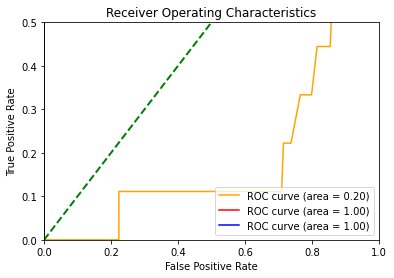

In [29]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr[0], tpr[0], color = "orange", label = "ROC curve (area = %0.2f)" % roc_auc[0])
plt.plot(fpr[1], tpr[1], color = "red", label = "ROC curve (area = %0.2f)" % roc_auc[1])
plt.plot(fpr[2], tpr[2], color = "blue", label = "ROC curve (area = %0.2f)" % roc_auc[2])
plt.plot([0,1], [0,1], color = "green", lw = 2, linestyle = "--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 0.5])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics")
plt.legend(loc = "lower right")
plt.show()